# Youtube Trends Project :

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import time
import requests
import random

In [60]:
pytrends = TrendReq(hl='en-US',tz=360)
keyword = ['Data Analytics']
pytrends.build_payload(keyword,cat=0,timeframe='today 12-m',geo='',gprop='youtube')
time.sleep(random.randint(5,15))
data = pytrends.interest_over_time()
print(data)

ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=2)

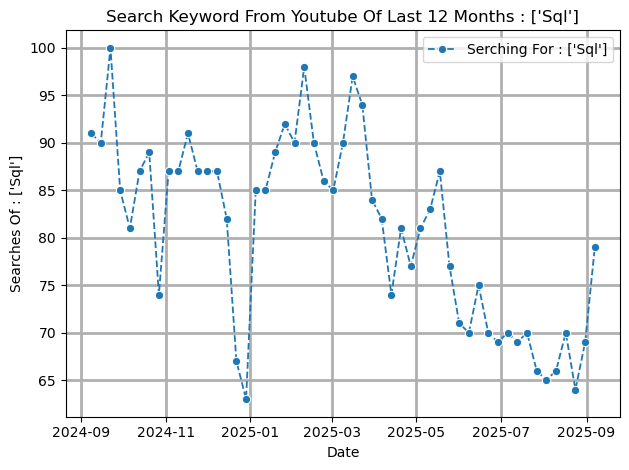

In [73]:
sns.lineplot(data=data,x='date',y=keyword[0],marker='o',linestyle='--',linewidth=1.3,label= f'Serching For : {keyword}')
plt.title(f'Search Keyword From Youtube Of Last 12 Months : {keyword}')
plt.xlabel('Date')
plt.ylabel(f'Searches Of : {keyword}')
plt.legend()
plt.grid(True,linewidth=2)
plt.tight_layout()
plt.show()

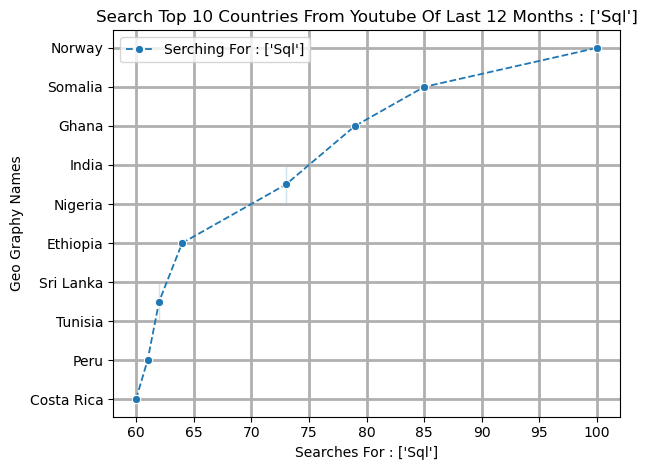

In [75]:
region = pytrends.interest_by_region()
top_10 = region.sort_values(by=keyword,ascending=False).head(10).reset_index()
#print(region)
sns.lineplot(data=top_10,x=keyword[0],y='geoName',marker='o',linestyle='--',linewidth=1.3,label= f'Serching For : {keyword}')
plt.title(f'Search Top 10 Countries From Youtube Of Last 12 Months : {keyword}')
plt.xlabel(f'Searches For : {keyword}')
plt.ylabel(f'Geo Graphy Names')
plt.legend()
plt.grid(True,linewidth=2)
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9392\492183035.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



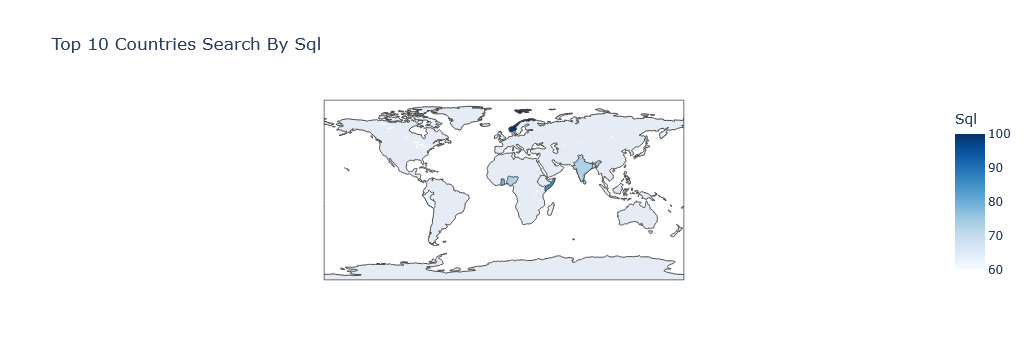

In [85]:
import plotly.express as px
Countries = top_10.reset_index()
fig = px.choropleth(
    Countries,
    locations='geoName',
    locationmode='country names',
    color=keyword[0],              # ✅ pick the string column
    title=f'Top 10 Countries Search By {keyword[0]}',
    color_continuous_scale='Blues'
)
fig.show()

In [121]:
lists = ['Ai','Web','Sql']
pytrends.build_payload(lists,cat=0,timeframe='today 12-m',gprop='youtube')
data = pytrends.interest_by_region().head(15)
print(data)

                   Ai  Web  Sql
geoName                        
Afghanistan         0    0    0
Albania             0    0    0
Algeria            62   35    3
American Samoa      0    0    0
Andorra             0    0    0
Angola              0    0    0
Anguilla            0    0    0
Antarctica          0    0    0
Antigua & Barbuda   0    0    0
Argentina          50   47    3
Armenia             0    0    0
Aruba               0    0    0
Australia          85   14    1
Austria            90    9    1
Azerbaijan          0    0    0


In [129]:
# Melt the Data  First :
compare = data.reset_index().melt(
    id_vars='geoName',
    value_vars=lists,
    var_name='keywords',
    value_name='Search_Interest'
)

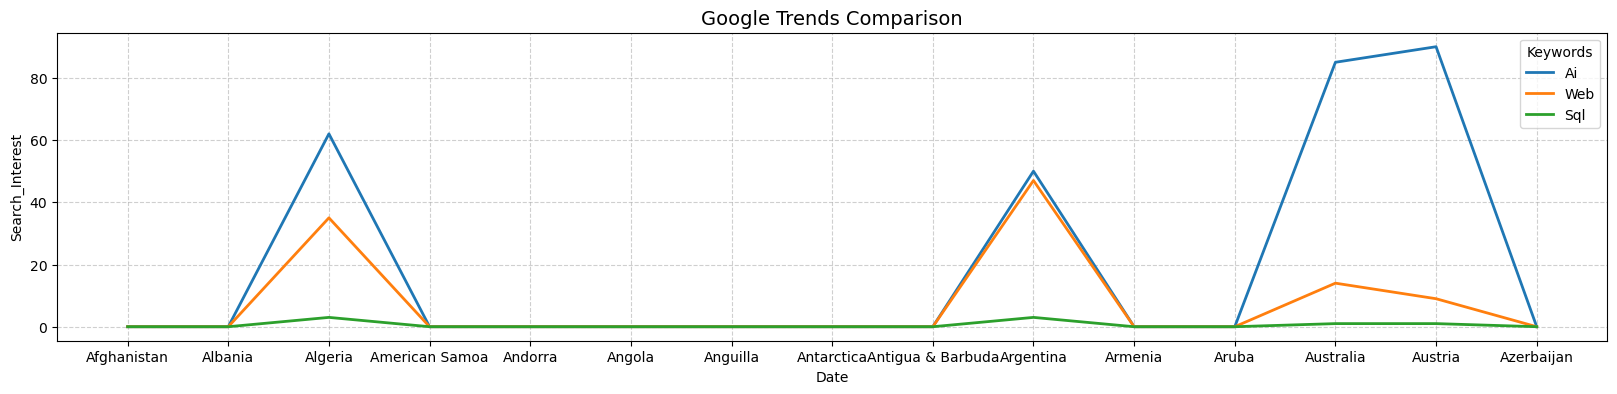

In [137]:
plt.figure(figsize=(20,4))
sns.lineplot(
    data=compare, 
    x="geoName", 
    y="Search_Interest",   # <-- match exact column name
    hue="keywords", 
    linewidth=2
)

plt.title("Google Trends Comparison", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Search_Interest")
plt.legend(title="Keywords")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()